## Hypothesis
To predict the incentive level requested to program washer and drier after 11pm
    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeS, EnergyC, MC, ComfNS, HabitC, Summer_avg, Winter_avg


In [1]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
#survey$IncHomeS[survey$IncHomeS==99] = NA;
#survey$IncHomeS[survey$IncHomeS==999] = NA;

#survey <- survey[survey$HomeS>60,];
#survey <- survey[survey$HomeS<80,];

#survey <- survey[survey$HomeW>60,];
#survey <- survey[survey$HomeW<80,];

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       4       5       5       6       7      56 


  1   2   3   4   5   6   7 
 47  34  64 137  41 160 123 

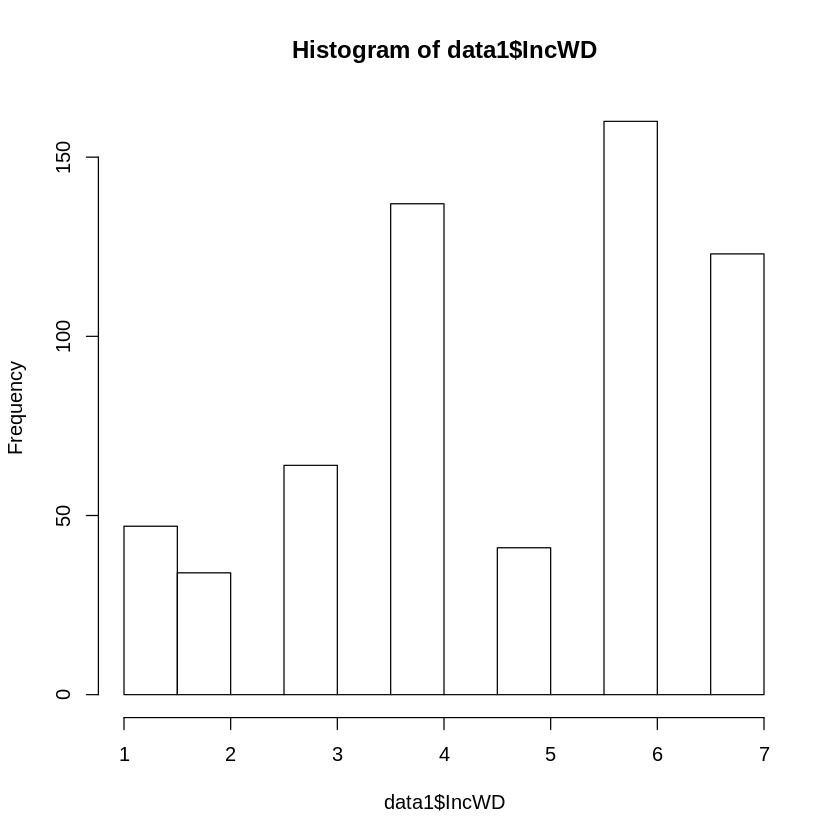

In [2]:
summary(data1$IncWD)
table(data1$IncWD)
hist(data1$IncWD)

In [3]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   
[1] "Latitude" "21"      
[1] "Summer_avgF" "33"         
[1] "Winter_avgF" "33"         
[1] "Summer_avgC" "33"         
[1] "Winter_avgC" "33"         
[1] "Summer_avg" "33"        
[1] "Winter_avg" "33"        


In [4]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 662 106
[1] 412 106


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     4.0     5.0     4.7     6.0     7.0 


  1   2   3   4   5   6   7 
 29  22  49  98  24 115  75 

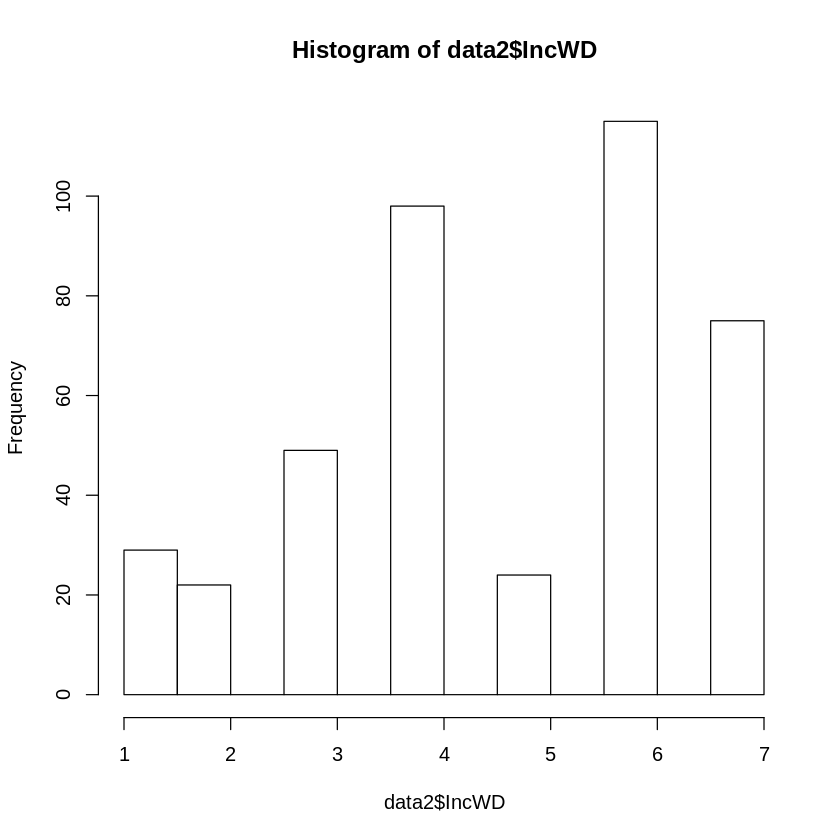

In [5]:
summary(data2$IncWD)
table(data2$IncWD)
hist(data2$IncWD)

In [6]:
sort(names(data2))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"   
 [31] "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"    
 [36] "Gender"      "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"    
 [41] "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"    
 [46] "HabitE2"     "HabitE3"     "HabitG"      "HomeS"       "HouseholdS" 
 [51] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S" 
 [61] "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"   
 [66] "IncWD"       "Income"      "Latitude"    "MC"          "MC1"        
 [71] "MC2"         "MC3"         "MC4"         "MC5"         "MCBill"     
 [76] "OwnRent"     "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
 [81] "PBC5"        "Political"   "RewardForm"  "SN"          "SN1"        
 [86] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
 [91] "State"       "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"   
 [96] "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"     
[101] "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF"
[106] "X.9to5"

In [7]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"HabitG",
"ConvB1")

In [8]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"   
 [31] "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"    
 [36] "Gender"      "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"    
 [41] "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"    
 [46] "HabitE2"     "HabitE3"     "HabitG"      "HomeS"       "HouseholdS" 
 [51] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S" 
 [61] "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"   
 [66] "IncWD"       "Income"      "Latitude"    "MC"          "MC1"        
 [71] "MC2"         "MC3"         "MC4"         "MC5"         "MCBill"     
 [76] "OwnRent"     "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
 [81] "PBC5"        "Political"   "RewardForm"  "SN"          "SN1"        
 [86] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
 [91] "State"       "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"   
 [96] "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"     
[101] "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF"
[106] "X.9to5"

[1] "Age"        "ComfNS"     "ConvB1"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Gender"     "HabitG"     "HouseholdS" "Income"    
[11] "MC"         "OwnRent"    "Political"  "SqftCate"   "Trust"

In [9]:
data1 <- data2[, which(names(data2) %in% c("IncWD",IVS))];
sort(names(data1))

[1] "Age"        "ComfNS"     "ConvB1"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Gender"     "HabitG"     "HouseholdS" "IncWD"     
[11] "Income"     "MC"         "OwnRent"    "Political"  "SqftCate"

In [10]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [11]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [12]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncWD"      "ConvB1"     "Age"        "Gender"     "OwnRent"   
 [6] "SqftCate"   "HouseholdS" "Political"  "Ethnic"     "Income"    
[11] "Educ"       "EnergyC"    "MC"         "ComfNS"     "HabitG"

In [13]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [14]:
hiCor(data2,.7)

<0 x 0 matrix>

In [16]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:15];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:15){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.15
    IncWD ConvB1 OwnRent SqftCate HouseholdS Political Income EnergyC    MC
PC1  0.23   0.39    0.26     0.35       0.23     -0.21   0.31   -0.34 -0.31
    ComfNS HabitG
PC1   0.24  -0.32
[1] 0.29
    ConvB1 Age Gender OwnRent SqftCate Income EnergyC   MC HabitG
PC2  -0.27 0.4   0.25    0.42      0.4   0.25    0.28 0.36   0.23
[1] 0.38
    IncWD Gender Political Income Educ ComfNS
PC3  0.36   0.27     -0.28   -0.4 -0.5    0.4
[1] 0.47
    IncWD   Age HouseholdS Political  Educ ComfNS
PC4 -0.37 -0.42       0.59     -0.31 -0.33  -0.25
[1] 0.54
    Gender HouseholdS Political Ethnic EnergyC    MC HabitG
PC5   0.51       0.29      0.49  -0.32    0.25 -0.25  -0.33
[1] 0.61
    Ethnic EnergyC HabitG
PC6   0.84    0.24  -0.31
[1] 0.67
    OwnRent Political Ethnic  Educ    MC ComfNS
PC7    0.22      0.33   0.29 -0.52 -0.31  -0.48
[1] 0.72
    IncWD ConvB1 Gender OwnRent HouseholdS
PC8 -0.67   0.23   0.35     0.4       -0.3
[1] 0.77
    IncWD ConvB1 Gender Political Income Educ ComfNS


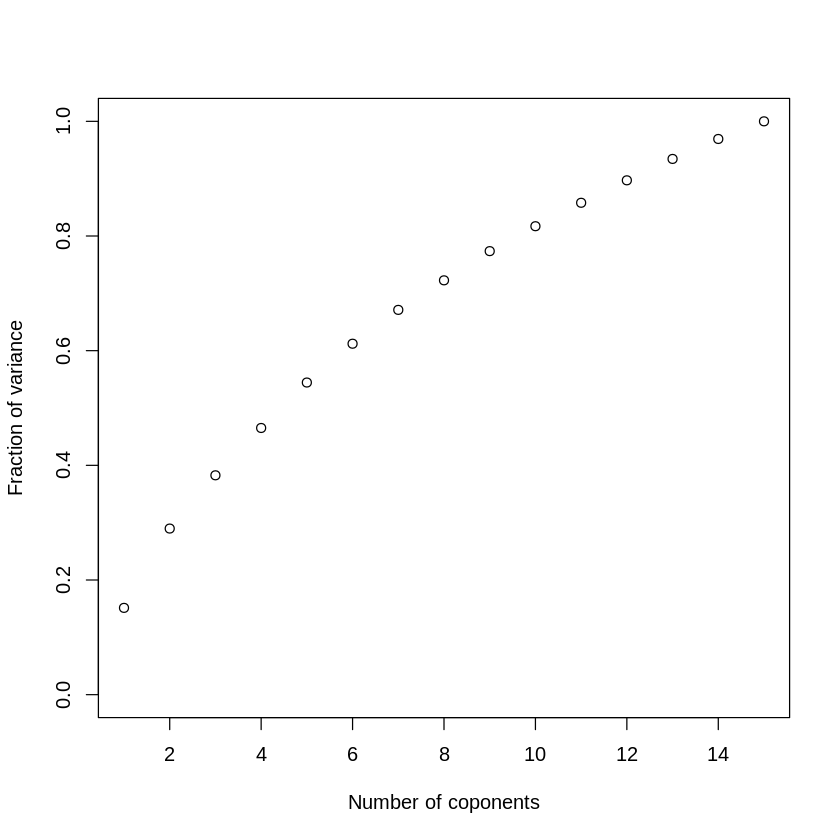

In [17]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [18]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [19]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

SqftCate,6,0.34
MC,13,0.28
ConvB1,2,0.27
OwnRent,5,0.27
Income,10,0.22
EnergyC,12,0.22
Age,3,0.20
HabitG,15,0.20
HouseholdS,7,0.18
Gender,4,0.13
Political,8,0.12


In [20]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [21]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')
IndepPred = c('Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'EnergyC', 'MC', 'ConvB1', 'HabitG')

In [22]:
fmla <- as.formula(paste("IncWD",paste(IndepPred,collapse="+"),sep="~"));

In [23]:
table(data2[,"IncWD"])


  1   2   3   4   5   6   7 
 29  22  49  98  24 115  75 

In [24]:
mod = lm(fmla,data=data2,subs=data2$Gender==1)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Gender == 1)

Residuals:
   Min     1Q Median     3Q    Max 
-4.484 -1.398  0.122  1.443  3.007 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.44298    1.38975    3.92  0.00013 ***
Gender            NA         NA      NA       NA    
OwnRent      0.33507    0.27258    1.23  0.22071    
SqftCate     0.19989    0.14549    1.37  0.17132    
HouseholdS   0.07084    0.11948    0.59  0.55406    
Political   -0.03327    0.18035   -0.18  0.85386    
Ethnic      -0.26990    0.42320   -0.64  0.52451    
Income       0.00119    0.07856    0.02  0.98793    
Educ        -0.07103    0.12952   -0.55  0.58416    
EnergyC     -0.11096    0.09414   -1.18  0.24021    
MC          -0.16540    0.13221   -1.25  0.21268    
ConvB1      -0.01410    0.11550   -0.12  0.90296    
HabitG      -0.02720    0.12565   -0.22  0.82888    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.